In [1]:
#Set up
import numpy as np
import imblearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_table("train.tsv")

<AxesSubplot:title={'center':'Number of Tweets by Category'}, xlabel='label'>

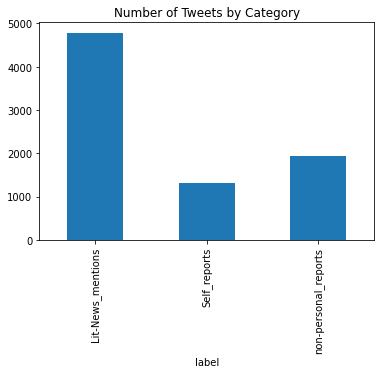

In [3]:
train_data.groupby('label').tweet_text.count().plot.bar(title='Number of Tweets by Category')


In [11]:
train_data

,tweet_id,tweet_text,label
0,102716,Los síntomas de la COVID-19 pueden variar de l...,Lit-News_mentions
1,201289,"Dolor de garganta y de todo el cuerpo, toca ir...",Self_reports
2,301102,"""Mi mujer ha dado positivo y ha tenido fiebre ...",non-personal_reports
3,105895,Destaca que algunos de los datos que se contie...,Lit-News_mentions
4,201322,No he tenido tiempo de tuitear pero me di un c...,Self_reports
...,...,...,...
8035,102976,REALISMO Y SALUD (COVID-19)Webmaster: Víctor L...,Lit-News_mentions
8036,200226,"Me acaban de notificar que tengo COVID-19 , me...",Self_reports
8037,200844,Ahora con dolor de cabeza me pueden considerar...,Self_reports
8038,100156,Identifica los síntomas de alarma y para solic...,Lit-News_mentions


In [13]:
X_train = train_data[['tweet_id', 'tweet_text']]
y_train = train_data['label']

In [14]:
X_train

,tweet_id,tweet_text
0,102716,Los síntomas de la COVID-19 pueden variar de l...
1,201289,"Dolor de garganta y de todo el cuerpo, toca ir..."
2,301102,"""Mi mujer ha dado positivo y ha tenido fiebre ..."
3,105895,Destaca que algunos de los datos que se contie...
4,201322,No he tenido tiempo de tuitear pero me di un c...
...,...,...
8035,102976,REALISMO Y SALUD (COVID-19)Webmaster: Víctor L...
8036,200226,"Me acaban de notificar que tengo COVID-19 , me..."
8037,200844,Ahora con dolor de cabeza me pueden considerar...
8038,100156,Identifica los síntomas de alarma y para solic...


In [23]:
y_train.unique

<bound method Series.unique of 0          Lit-News_mentions
1               Self_reports
2       non-personal_reports
3          Lit-News_mentions
4               Self_reports
                ...         
8035       Lit-News_mentions
8036            Self_reports
8037            Self_reports
8038       Lit-News_mentions
8039       Lit-News_mentions
Name: label, Length: 8040, dtype: object>

In [4]:
dev_data = pd.read_table("dev.tsv")

<AxesSubplot:title={'center':'Number of Tweets by Category'}, xlabel='label'>

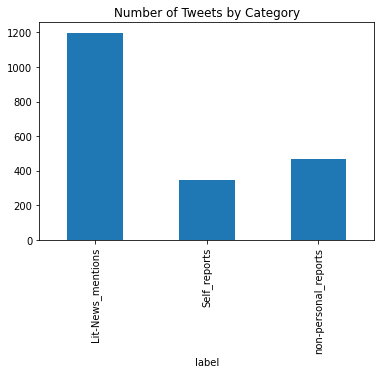

In [6]:
dev_data.groupby('label').tweet_text.count().plot.bar(title='Number of Tweets by Category')

# Lets over and undersample

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [26]:
#Oversampling our minority classes to be 70% of the majority class

oversample=RandomOverSampler(sampling_strategy={'Lit-News_mentions': 4786, 'non-personal_reports': 3350,
                                                'Self_reports': 3350}, random_state=123)

In [27]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [30]:
train_oversample = pd.concat([X_train_over, y_train_over], axis=1)

<AxesSubplot:title={'center':'Number of Tweets by Category'}, xlabel='label'>

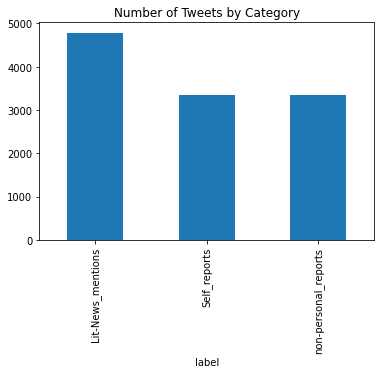

In [31]:
train_oversample.groupby('label').tweet_text.count().plot.bar(title='Number of Tweets by Category')

In [32]:
#Undersampling our original majority class to be 80% or its original size
undersample=RandomUnderSampler(sampling_strategy={'Lit-News_mentions': 3829, 'non-personal_reports': 3350,
                                                'Self_reports': 3350}, random_state=123)

In [33]:
X_train_overunder, y_train_overunder = undersample.fit_resample(X_train_over, y_train_over)

In [34]:
train_overundersample = pd.concat([X_train_overunder, y_train_overunder], axis=1)

<AxesSubplot:title={'center':'Number of Tweets by Category'}, xlabel='label'>

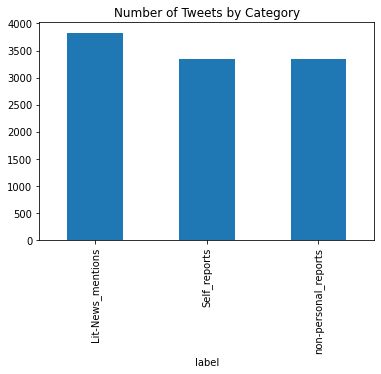

In [35]:
train_overundersample.groupby('label').tweet_text.count().plot.bar(title='Number of Tweets by Category')

In [36]:
train_overundersample.to_csv("train_over_under_sample.tsv", sep="\t", index = False)